### 웹 크롤링
- 웹 크롤러(Web Crawler)는 웹문서, 이미지 등을 주기적으로 수집하여 자동으로 데이터베이스화 하는 프로그램
- 크롤러가 하는 작업을 웹 크롤링(Web Crawling)이라 함
- requests와 beautifulsoup4 패키지 사용

### 1. 웹 문서 전체 가져오기
- urllib.request 패키지

In [7]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bs


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
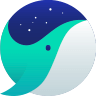
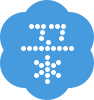

In [8]:
html = urlopen("https://naver.com/")
soup = bs(html, "html.parser")
print(soup)

- requests 패키지 사용 둘다 결과는 같음


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
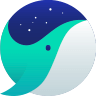
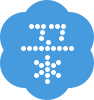

In [10]:
html = requests.get("https://naver.com/")
soup = bs(html.text, "html.parser")
print(soup)

### 2. html 태그에서 원하는 정보 추출하기
- html 태그를 이용하는 방법
- CSS Selector를 이용하는 방법

- html 태그
    - find("태그") - 첫번째 태그만 검색
    - find_all("태그") - 전체 태그 검색후 list로 반환

In [ ]:
# class를 이용한 태그 검색
find_div = soup.find("div", class_="group_nav")
find_div

# id를 이용한 태그 검색
find_div = soup.find("div", id="NM_FAVORITE")
find_div

In [21]:
# find all 사용
find_div = soup.find("div", class_="group_nav")
find_lst = find_div.find_all("li")
for item in find_lst:
    print(item.get_text())     # get_text() 는 모든 태그를 제거하고 텍스트만 남김
    print(item.find("a")['href'])     # 태그의 속성을 출력 href는 하이퍼링크 태그


메일

https://mail.naver.com/
카페
https://section.cafe.naver.com/
블로그
https://section.blog.naver.com/
지식iN
https://kin.naver.com/
쇼핑
https://shopping.naver.com/
쇼핑LIVE
https://shoppinglive.naver.com/home
Pay
https://order.pay.naver.com/home

TV

https://tv.naver.com/
사전
https://dict.naver.com/
뉴스
https://news.naver.com/
증권
https://finance.naver.com/
부동산
https://land.naver.com/
지도
https://map.naver.com/
VIBE
https://vibe.naver.com/
책
https://book.naver.com/
웹툰
https://comic.naver.com/


### CSS Selctor

In [28]:
css_soup = soup.select("#NM_FAVORITE > div.group_nav > ul.list_nav.type_fix")     # select는 리스트 형식으로 출력
css_a = css_soup[0].find_all("a")
for a in css_a:
    print(a.text)

메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV


#### 크롤링 연습
- 네이버 지식인에서 "선릉역"으로 검색 후 검색결과 가져오기

In [39]:
import requests
from bs4 import BeautifulSoup as bs

# 크롤링 대상 url
url = "https://kin.naver.com/search/list.naver?query=%EC%84%A0%EB%A6%89%EC%97%AD"

html = requests.get(url)     # url에서 데이터 요청
soup = bs(html.text, "html.parser")   # 요청 데이터를 파싱 진행

# CSS를 이용한 태그 검색
ul_soup = soup.select("#s_content > div.section > ul")

# 검색된 태그에서 다시 li 전체를 검색
li_soup = ul_soup[0].find_all("li")

# 검색된 li에서 원하는 태그 출력
print(li_soup[0].find("dt").get_text())     # 제목 출력
print(li_soup[0].find("dd").get_text())     # 등록일 출력
print(li_soup[0].select("dl > dd:nth-child(3)")[0].get_text())     # 내용 요약 find 말고 select 사용



성수동에서 지하철 타서 선릉역까지 가

2022.02.05.
성수동에서 지하철 타서 선릉역까지 가는 거로 1회용 지하철 카드? 그거 했는데... ▶ 거리비례제 요금을 말씀하신다면 - 성수역에서 선릉역은 약 11.2Km입니다.... 


#### [미션] 1페이지 검색 결과에서 전체 내용 가져오기
- 제목, 등록일, 요약 부분을 각각 가져와 DataFrame으로 저장

In [37]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# 크롤링 대상 url
url = "https://kin.naver.com/search/list.naver?query=%EC%84%A0%EB%A6%89%EC%97%AD"

html = requests.get(url)     # url에서 데이터 요청
soup = bs(html.text, "html.parser")   # 요청 데이터를 파싱 진행

# CSS를 이용한 태그 검색
ul_soup = soup.select("#s_content > div.section > ul")

# 검색된 태그에서 다시 li 전체를 검색
li_soup = ul_soup[0].find_all("li")

nav_kin = []
for li in li_soup:
    title = li.find("dt").get_text().replace("\n", "")
    date = li.find_all("dd")[0].get_text()
    doct = li.find_all("dd")[1].get_text()
    nav_kin.append({"제목":title, "등록일":date, "요약":doct})

In [38]:
df1 = pd.DataFrame(nav_kin)
df1

,제목,등록일,요약
0,성수동에서 지하철 타서 선릉역까지 가,2022.02.05.,성수동에서 지하철 타서 선릉역까지 가는 거로 1회용 지하철 카드? 그거 했는데......
1,동서울터미널에서 선릉역 까지 노선 좀,2022.01.02.,"동서울터미널에서 선릉역 까지 노선 좀 알려주세요? ""강변 - 잠실나루 - 잠실 -..."
2,증미역에서 선릉역까지 가는 가장 빠른...,2021.09.12.,9호선일반 증미역에서 선릉역9호선급행까지 가는 방법이... 추천해주세요 출퇴근시간이...
3,선릉역누네안과 망막전문의 소개부탁드립,2022.02.15.,"선릉역누네안과 망막전문의 소개부탁드립니다,망막이 찢어졌다구 하는데, 전문의 추천부탁..."
4,선릉역에서 쉽게 택시탈수 있는곳,2021.03.31.,선릉역에서 감남세브란스가려고 하는데 몇번 출구로 나가야 택시가 많을까요??... 개...
5,선릉역에 있는 안과 예약했는데,2021.10.08.,저희 엄마 노안 때문에.. 치료 예약을 해놨습니다. 인터넷에서 보기로는 노안도 치료...
6,신림사거리 출발 선릉역 도착,2021.04.20.,심야버스 N61번 버스 신림역에서 선릉역까지 시간이 얼마나걸리나요? 29정거장 정...
7,선릉역이랑 제일 가까운 공원 없나요?,2022.01.08.,선릉역이랑 제일 가까운 공원 없나요? 가깝고 큰공원으로는 도산공원있습니다. 아래는...
8,선릉역에서 논현2동으로 싱글침대 옮기,2021.10.19.,선릉역에서 논현2동으로 싱글침대 옮기는 용달비용 궁금해요 용달 기사도움 8만원 입...
9,선릉역의 발음과 어떤 음운 변동이...,2021.04.11.,선릉역 발음이 설릉녁이라고 된다고 알고 있는데 맞나요 ?? 어떤 음운 변동 때문에....


### 3. 검색어를 이용한 크롤링
* urllib 패키지의 parse 모듈

In [49]:
# parse 모듈 사용법
from urllib import parse

text = "선릉역"

enc = parse.quote(text)     # 컴퓨팅 언어로 인코딩
print(enc)

dec = parse.unquote("%EC%84%A0%EB%A6%89%EC%97%AD")   # 컴퓨팅 언어를 다시 사람이 보는 언어로 디코딩
print(dec)

%EC%84%A0%EB%A6%89%EC%97%AD
선릉역


In [45]:

from urllib import parse

search = input("검색어 입력: ")
enc_search = parse.quote(search)

# 크롤링 대상 url
url = "https://kin.naver.com/search/list.naver?query="
url = url + str(enc_search)

html = requests.get(url)     # url에서 데이터 요청
soup = bs(html.text, "html.parser")   # 요청 데이터를 파싱 진행

# CSS를 이용한 태그 검색
ul_soup = soup.select("#s_content > div.section > ul")

# 검색된 태그에서 다시 li 전체를 검색
li_soup = ul_soup[0].find_all("li")

nav_kin = []
for li in li_soup:
    title = li.find("dt").get_text().replace("\n", "")
    date = li.find_all("dd")[0].get_text()
    doct = li.find_all("dd")[1].get_text()
    nav_kin.append({"제목":title, "등록일":date, "요약":doct})

검색어 입력: 선릉역 맛집


In [46]:
df1 = pd.DataFrame(nav_kin)
df1

,제목,등록일,요약
0,이전했는데 선릉역 맛집 추천...,2021.12.20.,... 괜찮은 선릉역 맛집 있으면 꼭 추천 좀 부탁드릴게요!... 중이라 선릉역 맛...
1,"선릉역 맛집 추천좀, 근처로 이사왔어요.",2020.12.06.,"... 선릉역 맛집이 많다고 들었는데, 혹시 아시는데 있으면... 선릉역 맛집으로 ..."
2,선릉역 맛집 추천,2021.06.13.,선릉역 맛집 추천
3,선릉역 맛집 어딘가요??,2020.10.04.,선릉역 맛집하면 다 농민백암왕순대라고 하는데 맞나요?? 그 맞은편 조개구이무한리필...
4,[선릉역맛집] 회사주변 회식장소로...,2020.12.06.,... ^^ 분위기 좋고 맛있는 [선릉역맛집] 함께 찾아주세요 ! 선릉역 맛집으로...
5,선릉역맛집 분위기있는곳으로...,2011.07.11.,안녕하세요 선릉역맛집중에서 분위기있고 데이트하기에... 찾고있어요 선릉역맛집들 중에...
6,선릉역 맛집,2019.10.07.,선릉역 맛집 추천좀요 농민백암왕순대
7,선릉역맛집으로 데이트 할만한 장소 ?,2012.03.01.,선릉역맛집 추천바랍니다 여자친구와 다음주 월요일이 1주년인데요 여자친구 회사가......
8,선릉역 맛집어디에 있나요?,2013.06.20.,선릉역 맛집어디에 있나요? 선릉역7번출구 첫번째골목 샤브샤브 1번출구 이탈리안 레스...
9,강남역삼동/선릉역맛집으로...,2010.09.17.,... 괜찮은 강남 역삼동/선릉역맛집을 추천해주세요 고깃집같이 한번에 들어가는 시끄...


### 4. 검색된 내용 전체(페이지 이동)
- 네이버 지식인에서 검색어에 대한 10페이지까지의 결과 가져오기


In [50]:
# parse 모듈 사용법
from urllib import parse

search = input("검색어 입력: ")
enc_search = parse.quote(search)
nav_kin = []

for page in range(1, 11):
    # 크롤링 대상 url
    url = "https://kin.naver.com/search/list.naver?query="
    url = url + str(enc_search) + "&page=" + str(page)

    html = requests.get(url)     # url에서 데이터 요청
    soup = bs(html.text, "html.parser")   # 요청 데이터를 파싱 진행

    # CSS를 이용한 태그 검색
    ul_soup = soup.select("#s_content > div.section > ul")

    # 검색된 태그에서 다시 li 전체를 검색
    li_soup = ul_soup[0].find_all("li")

    for li in li_soup:
        title = li.find("dt").get_text().replace("\n", "")
        date = li.find_all("dd")[0].get_text()
        doct = li.find_all("dd")[1].get_text()
        nav_kin.append({"제목":title, "등록일":date, "요약":doct})
        
df = pd.DataFrame(nav_kin)
df

검색어 입력: 강남역


,제목,등록일,요약
0,강남역산부인과 중에 중절가능한곳.,2022.03.11.,부끄럽지만 강남역 부근 산부인과중에 임신중절이... 강남역산부인과 알아보시는군요. ...
1,강남역 30분컷 가능한 ~1000/60 투룸...,2022.02.15.,"강남역 교통으로 30분컷 가능한 보증금 1000이내, 월세... 질문주신 강남역 교..."
2,강남역 선별진료소,2022.01.31.,강남역 30일 일요일 선별진료소 운영하나요? 안녕하세요. 서울생활 행복도우미... ...
3,강남역 놀거리,2022.01.18.,강남역에서 놀 만한 데?나 카페 등등 특히 사진 예쁘게 많이 찍을 수 있는 곳 추천...
4,가슴성형을 하려는데 강남역이나 압구정...,2022.01.04.,설연휴쯤에 가슴 성형을 하려고 이제 상담을 다녀보려는데 강남역이나 압구정쪽에... ...
...,...,...,...
95,강남역pt 시설 좋고 선생님 좋은 곳!!,2022.01.14.,... 강남역pt로 시설도 깔끔하고 깨끗한 곳 있나요? 제가 운동하려고 마음을 잡으...
96,강남역 옷가게 선택 하는거 도와주세요,2021.12.27.,강남역 옷가게 괜찮은 곳 알려주세요!! 지하상가 보세 옷 말고 브랜드 옷가게로용!!...
97,강남역임신중절수술 빠르게 되는곳...,2022.02.24.,... 우선은 임신이 된건지 확인을 해봐야해서 병원 예약잡으려고 하는데 강남역......
98,강남역 -> 건대입구역,2021.12.25.,강남역에서 어디로 가야 건대입구역 방향인가요? 강남역에서 건대입구역 방향으로 가려...
